In [ ]:
import pandas as pd
segmentasyon=pd.read_excel("/content/PZ_segmentasyon (1).xlsx")
segmentasyon.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25


In [ ]:
segmentasyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cinsiyet               182 non-null    object        
 1   yas                    174 non-null    float64       
 2   il                     187 non-null    object        
 3   semt                   187 non-null    object        
 4   uyelik_tarihi          187 non-null    datetime64[ns]
 5   ilk_satın_alma         187 non-null    datetime64[ns]
 6   son_satın_alma         187 non-null    datetime64[ns]
 7   sipariş_adedi          187 non-null    int64         
 8   toplam_harcama         187 non-null    float64       
 9   toplam_indirim_tutarı  187 non-null    int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 14.7+ KB


In [ ]:
segmentasyon.isnull().sum()

cinsiyet                  5
yas                      13
il                        0
semt                      0
uyelik_tarihi             0
ilk_satın_alma            0
son_satın_alma            0
sipariş_adedi             0
toplam_harcama            0
toplam_indirim_tutarı     0
dtype: int64

In [ ]:
segmentasyon.fillna(segmentasyon.mean(), inplace=True) 

<ipython-input-275-6e087f997abc>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  segmentasyon.fillna(segmentasyon.mean(), inplace=True)
<ipython-input-275-6e087f997abc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  segmentasyon.fillna(segmentasyon.mean(), inplace=True)


In [ ]:
segmentasyon.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,187.0,39.293103,12.416182,10.0,31.0,38.0,46.00,78.00
sipariş_adedi,187.0,2.486631,3.218492,1.0,1.0,1.0,2.00,29.00
toplam_harcama,187.0,566.147219,980.933653,45.0,95.0,202.5,543.45,6331.25
toplam_indirim_tutarı,187.0,27.540107,20.999033,25.0,25.0,25.0,25.00,300.00


#Task-7A


In [ ]:
#Please calculate the average order value (AOV) by dividing the total amount spent (“toplam harcama”) by total order (“sipariş adedi”) per user and put these values to a new column. 

In [ ]:
segmentasyon["AOV"]=segmentasyon["toplam_harcama"]/segmentasyon["sipariş_adedi"]
segmentasyon.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.250
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,123.625
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,87.000
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,50.500
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.000


#Task-7B


In [ ]:
#Please calculate the duration from the membership date (“üyelik tarihi) until the current date (suppose that the current date is May 2, 2023). Then present these values in a new column with the name total life time. Please also visualize them via the use of hist (histogram) function.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import date
#İki farklı yol denedim, ikinci yolu uyguladım.
#segmentasyon["now"]=pd.to_datetime("202352", format="%Y%m%d", errors="ignore")
#segmentasyon["total_life_time"]=segmentasyon["now"]-segmentasyon["uyelik_tarihi"]
#segmentasyon.head()
now=pd.to_datetime("202352", format="%Y%m%d", errors="ignore")
segmentasyon["total_life_time"]=now-segmentasyon["uyelik_tarihi"]
segmentasyon.head()
segmentasyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   cinsiyet               182 non-null    object         
 1   yas                    187 non-null    float64        
 2   il                     187 non-null    object         
 3   semt                   187 non-null    object         
 4   uyelik_tarihi          187 non-null    datetime64[ns] 
 5   ilk_satın_alma         187 non-null    datetime64[ns] 
 6   son_satın_alma         187 non-null    datetime64[ns] 
 7   sipariş_adedi          187 non-null    int64          
 8   toplam_harcama         187 non-null    float64        
 9   toplam_indirim_tutarı  187 non-null    int64          
 10  AOV                    187 non-null    float64        
 11  total_life_time        187 non-null    timedelta64[ns]
dtypes: datetime64[ns](3), float64(3), int64(2), object

21
121


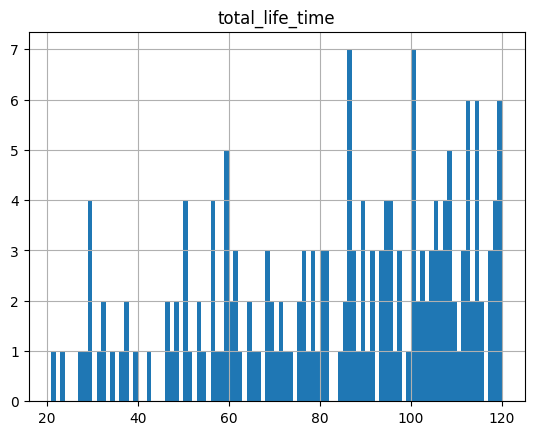

In [ ]:
segmentasyon['total_life_time'] = segmentasyon['total_life_time'].dt.days
print(segmentasyon['total_life_time'].min())
print(segmentasyon['total_life_time'].max())
segmentasyon['total_life_time'].hist(bins=range(21,121))
plt.title("total_life_time")
plt.xlabel("Count")
plt.ylabel("Sipariş Sayısı")
plt.show()

#Task-7C

In [ ]:
#Please calculate the duration (in days) from the last purchase/order date until the current date (suppose that the current date is May 2, 2023) and add this into the dataset as “Recency” column. Please also visualize them via the use of hist (histogram) function.

In [ ]:
segmentasyon["Recency"]=now-segmentasyon["son_satın_alma"]
segmentasyon.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV,total_life_time,Recency
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.250,100,51 days
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,123.625,100,15 days
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,87.000,53,37 days
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,50.500,56,56 days
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.000,107,107 days


6
121


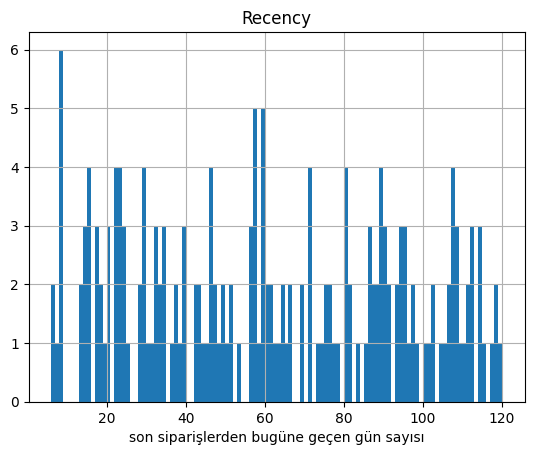

In [ ]:
segmentasyon["Recency"]=segmentasyon["Recency"].dt.days
print(segmentasyon["Recency"].min())
print(segmentasyon["Recency"].max())
segmentasyon["Recency"].hist(bins=range(6,121))
plt.title("Recency")
plt.xlabel("son siparişlerden bugüne geçen gün sayısı")
plt.show()

#Task-7D

In [ ]:
segmentasyon["duration_time"]=segmentasyon["ilk_satın_alma"]-segmentasyon["uyelik_tarihi"]
segmentasyon.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV,total_life_time,Recency,duration_time
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.250,100,51,35 days
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,123.625,100,15,0 days
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,87.000,53,37,16 days
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,50.500,56,56,0 days
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.000,107,107,0 days


80
0


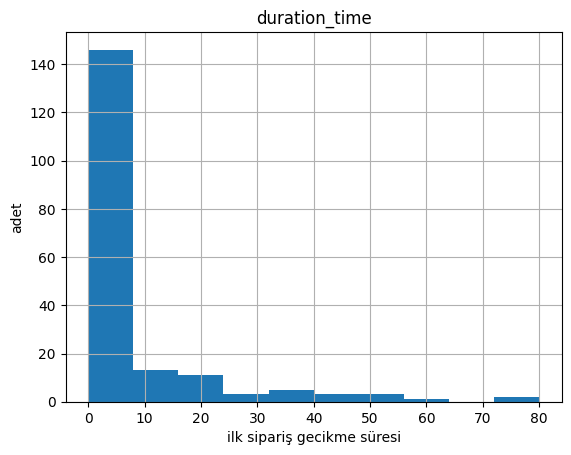

In [ ]:
segmentasyon["duration_time"]=segmentasyon["duration_time"].dt.days
print(segmentasyon["duration_time"].max())
print(segmentasyon["duration_time"].min())
segmentasyon["duration_time"].hist()
plt.title("duration_time")
plt.xlabel("ilk sipariş gecikme süresi")
plt.ylabel("adet")
plt.show()

#Task-7E

In [ ]:
yas=pd.qcut(segmentasyon["yas"],4)
yas_segmenti=segmentasyon.pivot_table("sipariş_adedi",yas)
yas_segmenti

,sipariş_adedi
yas,
"(9.999, 31.0]",1.840000
"(31.0, 38.0]",2.043478
"(38.0, 46.0]",2.404255
"(46.0, 78.0]",3.772727


Text(0.5, 1.0, 'Yaşalara göre ortalama sipariş değeri')

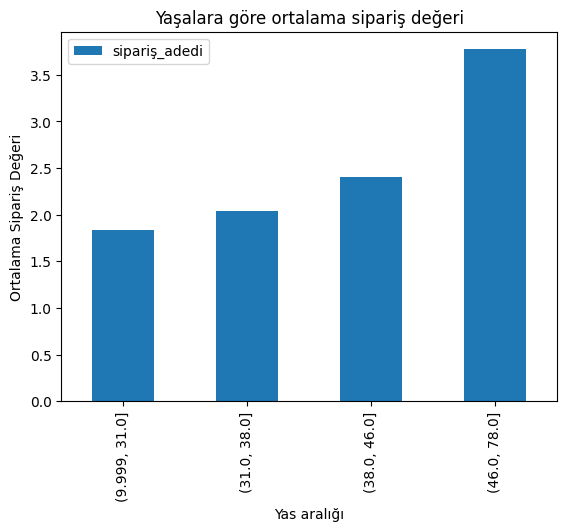

In [ ]:
yas_segmenti.plot(kind='bar');
plt.xlabel("Yas aralığı")
plt.ylabel("Ortalama Sipariş Değeri")
plt.title("Yaşalara göre ortalama sipariş değeri")

#Task-7F

In [ ]:
yas=pd.qcut(segmentasyon["yas"],4)
yas_segmenti1=segmentasyon.pivot_table("sipariş_adedi",columns="cinsiyet",index=yas)
yas_segmenti1

cinsiyet,Erkek,Kadın
yas,,
"(9.999, 31.0]",1.470588,2.031250
"(31.0, 38.0]",1.600000,2.310345
"(38.0, 46.0]",2.000000,2.526316
"(46.0, 78.0]",1.555556,4.323529


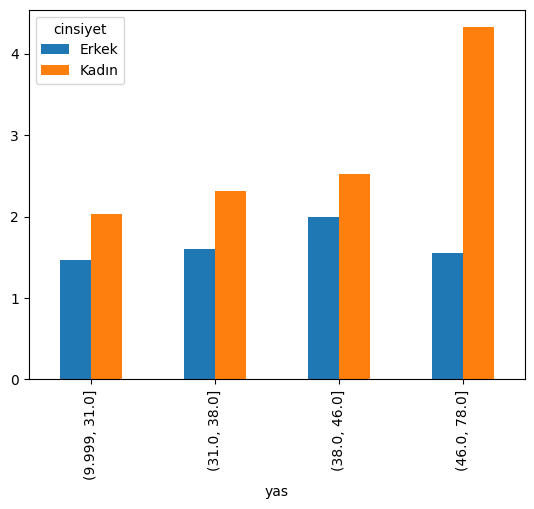

In [ ]:
yas_segmenti1.plot(kind='bar');

In [ ]:
yas=pd.qcut(segmentasyon["yas"],4)
yas_segmenti2=segmentasyon.pivot_table("sipariş_adedi",columns="cinsiyet",index=yas,aggfunc="count")
yas_segmenti2

cinsiyet,Erkek,Kadın
yas,,
"(9.999, 31.0]",17,32
"(31.0, 38.0]",15,29
"(38.0, 46.0]",8,38
"(46.0, 78.0]",9,34


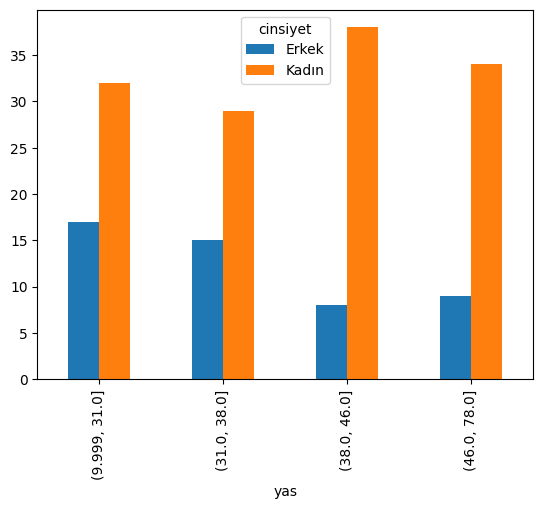

In [ ]:
yas_segmenti2.plot(kind='bar');

#Task-7G

In [ ]:
semt_siparis=segmentasyon.groupby("semt")["sipariş_adedi"].sum()
semt_siparis
semt_siparis.describe()

count    30.000000
mean     15.500000
std      17.940034
min       1.000000
25%       2.000000
50%       9.500000
75%      19.750000
max      74.000000
Name: sipariş_adedi, dtype: float64

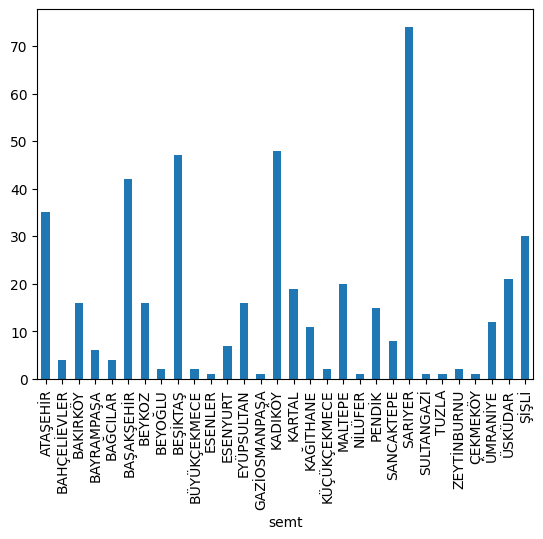

In [ ]:
semt_siparis.plot(kind='bar');

In [ ]:
siparis=segmentasyon["semt"].value_counts()
siparis

KADIKÖY          19
SARIYER          16
BEŞİKTAŞ         16
ATAŞEHİR         14
KARTAL           14
MALTEPE          12
KAĞITHANE         9
BAŞAKŞEHİR        8
ÜSKÜDAR           8
ŞİŞLİ             8
SANCAKTEPE        7
ÜMRANİYE          7
ESENYURT          7
PENDİK            6
BEYKOZ            5
EYÜPSULTAN        5
BAKIRKÖY          4
BAHÇELİEVLER      4
BAĞCILAR          3
BÜYÜKÇEKMECE      2
BEYOĞLU           2
KÜÇÜKÇEKMECE      2
ZEYTİNBURNU       2
BAYRAMPAŞA        1
GAZİOSMANPAŞA     1
SULTANGAZİ        1
NİLÜFER           1
TUZLA             1
ÇEKMEKÖY          1
ESENLER           1
Name: semt, dtype: int64

In [ ]:
toplam_semt=siparis.nlargest(4).index
segment=segmentasyon[segmentasyon["semt"].isin(toplam_semt)]
segment

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV,total_life_time,Recency,duration_time
0,Erkek,35.000000,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.2500,100,51,35
4,Kadın,43.000000,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.0000,107,107,0
6,Erkek,37.000000,İSTANBUL,KADIKÖY,2023-01-08,2023-01-08,2023-01-08,1,203.5,25,203.5000,114,114,0
7,Kadın,39.293103,İSTANBUL,SARIYER,2023-01-28,2023-01-29,2023-01-29,1,245.0,25,245.0000,94,93,1
8,Kadın,31.000000,İSTANBUL,KADIKÖY,2023-02-15,2023-02-15,2023-02-15,1,202.0,25,202.0000,76,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Kadın,38.000000,İSTANBUL,ATAŞEHİR,2023-01-09,2023-02-28,2023-02-28,1,225.0,25,225.0000,113,63,50
181,Kadın,39.293103,İSTANBUL,BEŞİKTAŞ,2023-01-25,2023-01-27,2023-01-27,1,144.5,25,144.5000,97,95,2
183,Erkek,62.000000,İSTANBUL,ATAŞEHİR,2023-01-08,2023-01-08,2023-02-02,2,590.0,25,295.0000,114,89,0
184,Kadın,47.000000,İSTANBUL,ATAŞEHİR,2023-01-25,2023-01-25,2023-01-25,1,309.0,25,309.0000,97,97,0


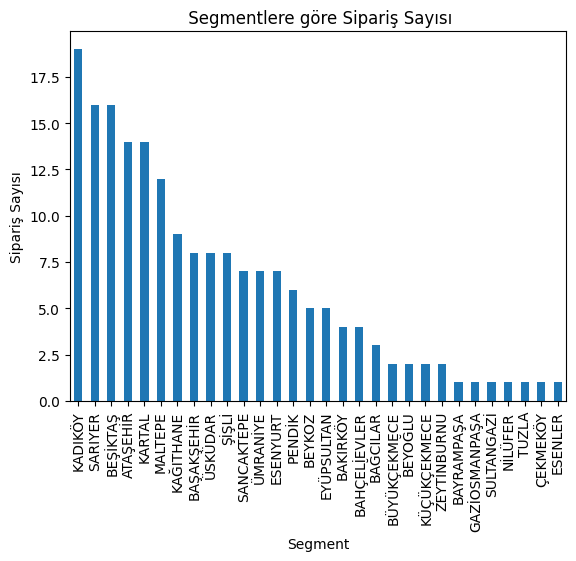

In [ ]:
siparis.plot(kind="bar",title= " Segmentlere göre Sipariş Sayısı")
plt.xlabel("Segment")
plt.ylabel("Sipariş Sayısı")
plt.show()

#Task-7H

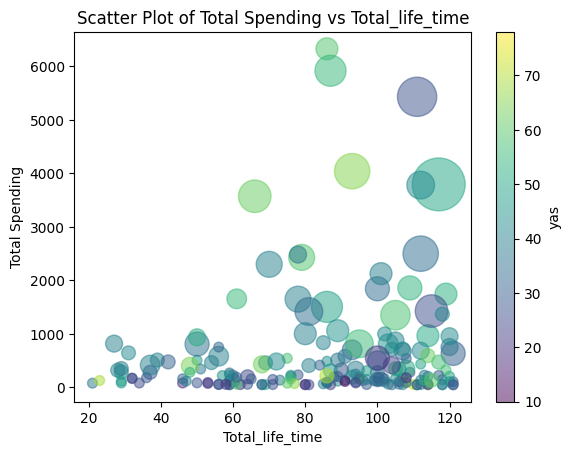

In [ ]:
import matplotlib.pyplot as plt
colors=segmentasyon['yas']
sizes=segmentasyon['sipariş_adedi']*50
plt.scatter(segmentasyon['total_life_time'], segmentasyon['toplam_harcama'], s=sizes, c=colors, cmap='viridis', alpha=0.5)

plt.xlabel('Total_life_time')
plt.ylabel('Total Spending')
plt.title('Scatter Plot of Total Spending vs Total_life_time')

colorbar = plt.colorbar()
colorbar.set_label('yas')

plt.show()